# Coding Tasks:

Start a new Jupyter Notebook to complete these tasks. This week, you'll be combining two different datasets.

First, you'll work with a dataset containing the number of primary care physicians per county for each county in the United States. It was obtained from the Area Health Resources File, published by the [Health Resources and Services Administration](https://data.hrsa.gov/topics/health-workforce/ahrf). This data is contained in the file `primary_care_physicians.csv`.

Second, the file `population_by_county.csv` contains the Census Bureau's 2019 population estimates for each US County. It also contains a column `urban`. The `urban` column uses data from the National Bureau of Economic Research to classify each county as either urban or rural. The U.S. Office of Management and Budget designates counties as metropolitan (a core urban area of 50,000 or more population), micropolitan (an urban core of at least 10,000 but less than 50,000 population), or neither. Here, a county is considered "urban" if it is part of a metropolitan or micropolitan area and "rural" if it is not.

1. First, import the primary care physicians dataset (`primary_care_physicians.csv`) into a data frame named `physicians`. 

In [1]:
import pandas as pd

physicians = pd.read_csv('../data/primary_care_physicians.csv')

 2. Filter `physicians` down to just the counties in Tennessee. Save the filtered dataframe back to `physicians`. Verify that the resulting dataframe has 95 rows.


In [2]:
physicians =  physicians.loc[physicians['state']=='Tennessee']
physicians.head()

,FIPS,state,county,primary_care_physicians
2432,47001,Tennessee,Anderson,39.0
2433,47003,Tennessee,Bedford,15.0
2434,47005,Tennessee,Benton,3.0
2435,47007,Tennessee,Bledsoe,1.0
2436,47009,Tennessee,Blount,90.0


 3. Look at the distribution of the number of primary care physicians. What do you notice?


 4. Now, import the population by county dataset (`population_by_county.csv`) into a DataFrame named `population`.


In [5]:
population = pd.read_csv('../data/population_by_county.csv')

 5. Merge the `physicians` DataFrame with the `population` DataFrame. Keep only the values for Tennessee. When you merge, be sure the include both the `population` and `urban` columns in the merged results. Save the result of the merge back to `physicians`.


In [7]:
physicians = pd.merge(left=physicians,right=population.drop(columns=['county','state']).loc[population['state']=='TENNESSEE'],on='FIPS')
# need not .loc[population['state']=='TENNESSEE' since left already only TN

 6. How many Tennessee counties are considered urban?


 7. The State Health Access Data Assistance Center (SHADAC) (https://www.shadac.org/) classifies counties into three groups based on the number of residents per primary care physician. First, counties with fewer than 1500 residents per primary care physician are considered to have an "adequate" supply. Counties with at least 1500 residents but fewer than 3500 residents per primary care physician are considered to have a "moderately inadequate" supply, and counties with at least 3500 residents per primary care physician are considered to have a "low inadequate" supply. How many counties in Tennessee are in each group? 


In [9]:
# physicians.head()
adequate_county = physicians.loc[physicians['population']/physicians['primary_care_physicians'] <= 1500]
moderately_inadequate_county = physicians.loc[physicians['population']/physicians['primary_care_physicians'] < 3500].drop(adequate_county.index)
low_inadequate_county = physicians.loc[physicians['population']/physicians['primary_care_physicians'] >= 3500]

In [10]:
print('number of adequate county: ', adequate_county.shape[0])
print('number of moderately inadequate county: ', moderately_inadequate_county.shape[0])
print('number of low inadequate county: ', low_inadequate_county.shape[0])

number of adequate county:  14
number of moderately inadequate county:  50
number of low inadequate county:  31


 8. Does there appear to be any detectable relationship between whether a county is urban or rural and its supply of primary care physicians?

In [11]:
adequate_county_urban = adequate_county.loc[adequate_county['urban']=='Urban']
moderately_inadequate_county_urban = moderately_inadequate_county.loc[moderately_inadequate_county['urban']=='Urban']
low_inadequate_county_urban = low_inadequate_county.loc[low_inadequate_county['urban']=='Urban']


In [12]:
print('rate of adequate county: ', adequate_county_urban.shape[0]/adequate_county.shape[0])
print('rate of moderately inadequate county: ', moderately_inadequate_county_urban.shape[0]/moderately_inadequate_county.shape[0])
print('rate of low inadequate county: ', low_inadequate_county_urban.shape[0]/low_inadequate_county.shape[0])

# can use value_counts(normalize = 'True')

rate of adequate county:  0.6428571428571429
rate of moderately inadequate county:  0.38
rate of low inadequate county:  0.3225806451612903


## Week 3:




New Topics:

 * Exploratory Data Analysis
  

Coding Task:

This week, you will build off of your work from last week.
1. First, (if you haven't done so already), create a new column indicating the SHADAC classification for each Tennessee county. You can use the following code to accomplish this:


In [15]:
physicians.loc[physicians['population']/physicians['primary_care_physicians'] < 1500, 'shadac_category'] = 'adequate'
physicians.loc[(physicians['population']/physicians['primary_care_physicians'] >= 1500) & 
          (physicians['population']/physicians['primary_care_physicians'] < 3500), 'shadac_category'] = 'moderately inadequate'
physicians.loc[(physicians['population']/physicians['primary_care_physicians'] >= 3500), 'shadac_category'] = 'low inadequate'

In [16]:
physicians.head()

,FIPS,state,county,primary_care_physicians,population,urban,shadac_category
0,47001,Tennessee,Anderson,39.0,76061,Urban,moderately inadequate
1,47003,Tennessee,Bedford,15.0,48292,Rural,moderately inadequate
2,47005,Tennessee,Benton,3.0,16140,Rural,low inadequate
3,47007,Tennessee,Bledsoe,1.0,14836,Rural,low inadequate
4,47009,Tennessee,Blount,90.0,129927,Urban,adequate




2. Use this new column to investigate if there is any relationship between a county's status as urban or rural and its SHADAC classification. Create a plot showing what you find.


In [17]:
import seaborn as sns

<AxesSubplot: ylabel='Frequency'>

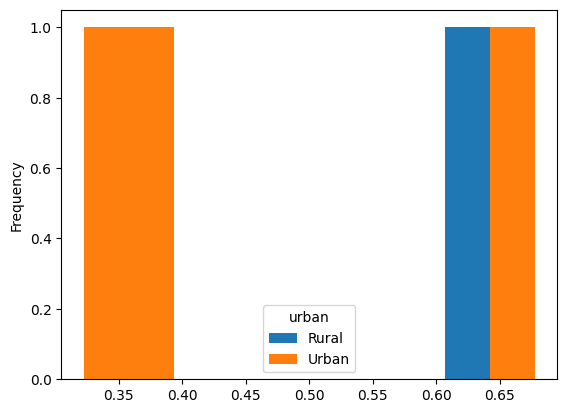

In [27]:
(
    pd.crosstab(physicians['shadac_category'],
    physicians['urban'],
    normalize='index')
    .plot(kind='hist')
)

3. Merge the unemployment data (contained in tn_unemployment.csv) into the physicians DataFrame.


In [28]:
unemployment = pd.read_csv('../data/tn_unemployment.csv')
unemployment.head()

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2
2,CN4700500000000,47,5,"Benton County, TN",Mar-21,6723,6305,418,6.2
3,CN4700700000000,47,7,"Bledsoe County, TN",Mar-21,4252,3947,305,7.2
4,CN4700900000000,47,9,"Blount County, TN",Mar-21,64098,61119,2979,4.6


In [29]:
unemployment['FIPS'] = unemployment['laus_code'].str[2:7].astype(int)
unemployment.head(2)

,laus_code,State,County,Name,Period,LF,Employed,Unemployed,unemployment_rate,FIPS
0,CN4700100000000,47,1,"Anderson County, TN",Mar-21,34704,33010,1694,4.9,47001
1,CN4700300000000,47,3,"Bedford County, TN",Mar-21,20623,19550,1073,5.2,47003


In [35]:
physicians = pd.merge(left = physicians,
                      right = unemployment.drop(columns=['State', 'laus_code','County','Name']),
                      on = 'FIPS')

4. How do unemployment rates compare for urban counties versus rural counties?


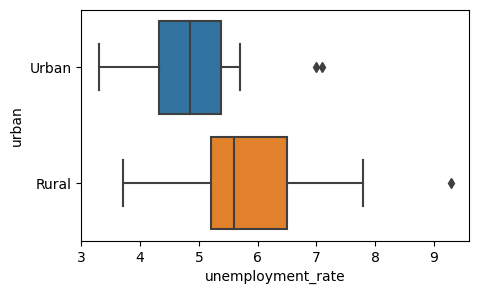

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))

sns.boxplot(data = physicians,
           x = 'unemployment_rate',
           y = 'urban');

5. Create a new column, `pcp_per_100k` which contains the number of primary care physicians per 100,000 residents. Investigate the relationship between this new measure and the unemployment rate per county. What do you find?


In [39]:
physicians['pcp_per_100k'] = physicians['primary_care_physicians']/physicians['population']*100000

<AxesSubplot: xlabel='unemployment_rate', ylabel='pcp_per_100k'>

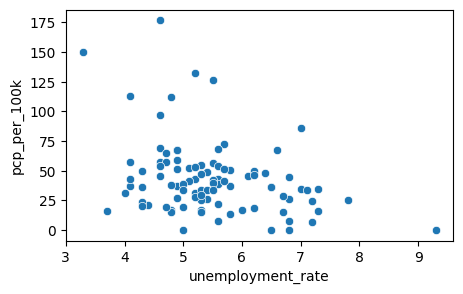

In [51]:
plt.figure(figsize = (5,3))

sns.scatterplot(data = physicians,
                x = 'unemployment_rate',
                y = 'pcp_per_100k');

In [59]:
physicians[['unemployment_rate','pcp_per_100k']].corr()

,unemployment_rate,pcp_per_100k
unemployment_rate,1.000000,-0.335333
pcp_per_100k,-0.335333,1.000000
